# Importing standard libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
# Reading the Data from csv file to pandas dataframe.
data = pd.read_csv("C:/Users/SagarBhavsar/Desktop/Support Vectors/Datasets/Data/traffic-collision-data-from-2010-to-present.csv")

In [3]:
# Checking that the data is loaded correctly
data.head(5)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Premise Description,Address,Cross Street,Location,Zip Codes,Census Tracts,Precinct Boundaries,LA Specific Plans,Council Districts,Neighborhood Councils (Certified)
0,191216137,2019-06-15T00:00:00.000,2019-06-15T00:00:00.000,330,12,77th Street,1203,997,TRAFFIC COLLISION,4025 3028 3101 3006 3030,...,STREET,52ND ST,WESTERN AV,"{'longitude': '-118.3089', 'latitude': '33.995...",24027.0,742.0,1049.0,7.0,14.0,35.0
1,191011095,2019-06-15T00:00:00.000,2019-06-15T00:00:00.000,1425,10,West Valley,1017,997,TRAFFIC COLLISION,NaN,...,PARKING LOT,17200 SATICOY ST,NaN,"{'longitude': '-118.5077', 'latitude': '34.208...",19734.0,259.0,315.0,NaN,3.0,61.0
2,190411077,2019-06-15T00:00:00.000,2019-06-15T00:00:00.000,1200,4,Hollenbeck,469,997,TRAFFIC COLLISION,4024 3036 3004 3026 3034 3029 3101,...,STREET,4TH ST,INDIANA ST,"{'longitude': '-118.1924', 'latitude': '34.032...",24028.0,516.0,956.0,NaN,9.0,38.0
3,190511313,2019-06-15T00:00:00.000,2019-06-15T00:00:00.000,850,5,Harbor,504,997,TRAFFIC COLLISION,NaN,...,STREET,1600 W 207TH ST,NaN,"{'longitude': '-118.3066', 'latitude': '33.842...",25715.0,944.0,825.0,NaN,15.0,55.0
4,191814225,2019-06-15T00:00:00.000,2019-06-15T00:00:00.000,435,18,Southeast,1846,997,TRAFFIC COLLISION,4025 3028 3101 3006 3030,...,STREET,EVERS AV,111TH ST,"{'longitude': '-118.2473', 'latitude': '33.934...",24354.0,821.0,1186.0,7.0,15.0,40.0


# 1. Understanding the Data

The data has 476337 rows and 24 columns. The rows represent the traffic collision and the columns represent the attributes of the collision.

In [4]:
data.shape

(476337, 24)

Analyzing the columns about the kind of data they represent. We get the following information:
   1. 5 columns are of type integer
   2. 11 columns are of type string(object datatype)
   3. 8 columns are of type float(decimal values)

Also, not all cloumns have 476337 values which indicate some values are missing.The columns with missing values are:
   1. MO Codes
   2. Victim Age                           
   3. Victim Sex                           
   4. Victim Descent                     
   5. Premise Code                         
   6. Premise Description
   7. Cross Street
   8. Zip Codes                          
   9. Census Tracts                       
   10. Precinct Boundaries                  
   11. LA Specific Plans                    
   12. Council Districts                    
   13. Neighborhood Councils (Certified)  
    

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476337 entries, 0 to 476336
Data columns (total 24 columns):
DR Number                            476337 non-null int64
Date Reported                        476337 non-null object
Date Occurred                        476337 non-null object
Time Occurred                        476337 non-null int64
Area ID                              476337 non-null int64
Area Name                            476337 non-null object
Reporting District                   476337 non-null int64
Crime Code                           476337 non-null int64
Crime Code Description               476337 non-null object
MO Codes                             391462 non-null object
Victim Age                           398919 non-null float64
Victim Sex                           469409 non-null object
Victim Descent                       468704 non-null object
Premise Code                         476312 non-null float64
Premise Description                  476312 non-null

#  2. Missing Values

The line plot plotted below gives the number os missing values for each column.

DR Number                                 0
Date Reported                             0
Date Occurred                             0
Time Occurred                             0
Area ID                                   0
Area Name                                 0
Reporting District                        0
Crime Code                                0
Crime Code Description                    0
MO Codes                              84875
Victim Age                            77418
Victim Sex                             6928
Victim Descent                         7633
Premise Code                             25
Premise Description                      25
Address                                   0
Cross Street                          21138
Location                                  0
Zip Codes                               395
Census Tracts                          6461
Precinct Boundaries                    3064
LA Specific Plans                    301102
Council Districts               

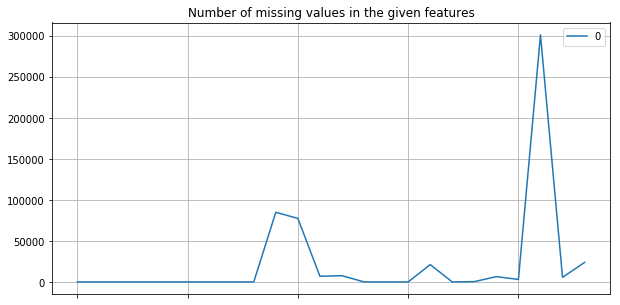

In [6]:
line_plot = pd.DataFrame(data.isnull().sum()).plot.line(figsize=(10, 5),grid=True)
line_plot.xticks = (data.index)
line_plot.set_title("Number of missing values in the given features")
data.isnull().sum()

Text(0.5, 1.0, 'Missing values heatmap')

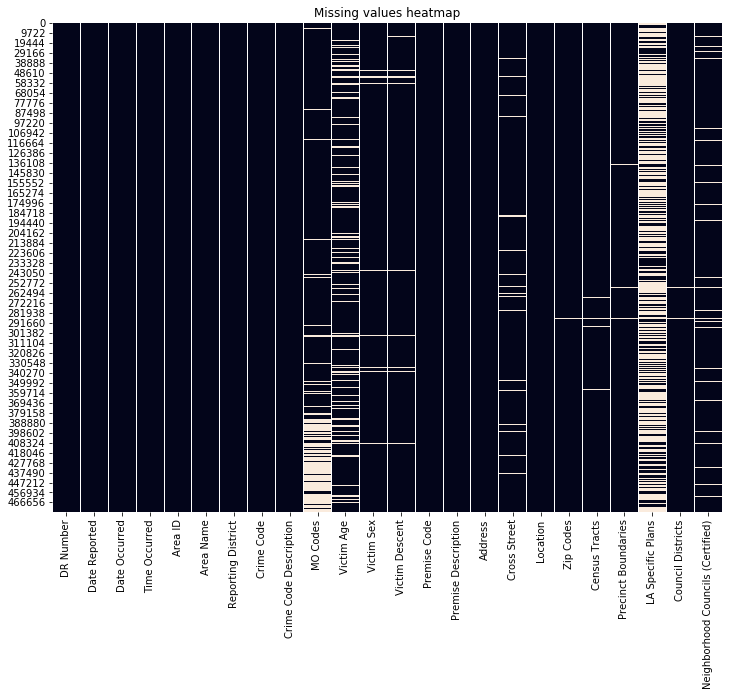

In [7]:
plt.figure(figsize=(12, 9))
sns.heatmap(data.isnull(),cbar = False).set_title("Missing values heatmap")


    63.2% - LA Specific Plans
    17.8% - MO Codes
    16.2% - Victim Age

Since 63.2% of data is not unavailable for the "LA Specific Plans" column.Hence, it can be dropped in our analysis and prediction. An alternate approach would have been to predict values for the missing values. However, it is not recommended as the number of values available for this column is significantly lower.

Every other column has missing values of less than 20% so we can impute them by replacing them with median values

Premise Code, Premise Description and Zip Codes have missing values of less than 1% so we can substitute it with the mode values of the respective column values.                 


# 3. Unique Values - Categorical Values

To understand the values taken by categorical variables, we count the number of unique values the vatiables can take.

We have 

In [8]:
data.nunique()

DR Number                            475540
Date Reported                          3453
Date Occurred                          3453
Time Occurred                          1439
Area ID                                  21
Area Name                                21
Reporting District                     1328
Crime Code                                1
Crime Code Description                    1
MO Codes                              71826
Victim Age                               90
Victim Sex                                5
Victim Descent                           20
Premise Code                            108
Premise Description                     108
Address                               25207
Cross Street                          19206
Location                              40404
Zip Codes                               197
Census Tracts                          1227
Precinct Boundaries                    1417
LA Specific Plans                        35
Council Districts               

In [9]:
data['Victim Sex'].value_counts()

M    277993
F    180510
X     10758
H       137
N        11
Name: Victim Sex, dtype: int64

According to the data, Victim Sex takes 5 values. When analyzed the values taken by this column, we found that apart from the regular and logical M= Male, F= Female and X= Unknown, it had very few occurrences of H & N values. So from the above frequency of each 

In [10]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
DR Number,476337.0,1.462045e+08,2.738341e+07,100100007.0,121411728.0,150516535.0,170904555.0,192111485.0
Time Occurred,476337.0,1.354772e+03,5.970183e+02,1.0,930.0,1430.0,1820.0,2359.0
Area ID,476337.0,1.107033e+01,5.876893e+00,1.0,6.0,11.0,16.0,21.0
Reporting District,476337.0,1.153179e+03,5.889750e+02,100.0,666.0,1149.0,1651.0,2199.0
Crime Code,476337.0,9.970000e+02,0.000000e+00,997.0,997.0,997.0,997.0,997.0
Victim Age,398919.0,4.158115e+01,1.618386e+01,10.0,29.0,39.0,51.0,99.0
Premise Code,476312.0,1.024302e+02,2.328123e+01,101.0,101.0,101.0,101.0,937.0
Zip Codes,475942.0,2.017173e+04,6.027292e+03,2436.0,19339.0,23074.0,23668.0,27324.0
Census Tracts,469876.0,5.609431e+02,3.904650e+02,1.0,286.0,543.0,757.0,2343.0
Precinct Boundaries,473273.0,8.714599e+02,3.757665e+02,14.0,539.0,897.0,1183.0,1560.0


Text(0.5, 1.0, 'Histogram of Area ID')

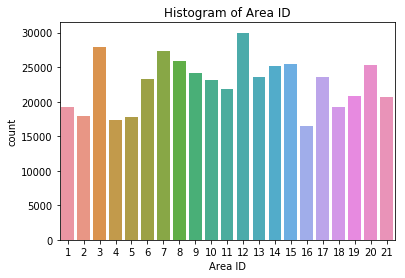

In [21]:
sns.countplot(data["Area ID"])
plt.title("Histogram of Area ID")

Text(0.5, 1.0, 'Histogram of Council Districts')

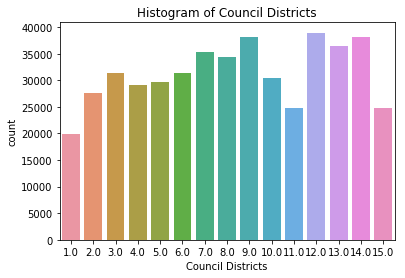

In [20]:
sns.countplot(data["Council Districts"])
plt.title("Histogram of Council Districts")

In [16]:
data["Premise Description"].value_counts()

STREET                                                       454341
PARKING LOT                                                   15427
SIDEWALK                                                       2373
ALLEY                                                           827
DRIVEWAY                                                        808
FREEWAY                                                         446
SINGLE FAMILY DWELLING                                          313
GAS STATION                                                     302
TRANSPORTATION FACILITY (AIRPORT)                               154
GARAGE/CARPORT                                                  135
OTHER PREMISE                                                   129
OTHER/OUTSIDE                                                   100
VACANT LOT                                                       93
PARK/PLAYGROUND                                                  90
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    

Descent Code: 
1. A - Other Asian 
2. B - Black         
3. C - Chinese 
4. D - Cambodian 
5. F - Filipino 
6. G - Guamanian 
7. H - Hispanic/Latin/Mexican 
8. I - American Indian/Alaskan Native 
9. J - Japanese 
10. K - Korean 
11. L - Laotian 
12. O - Other 
13. P - Pacific Islander 
14. S - Samoan 
15. U - Hawaiian 
16. V - Vietnamese 
17. W - White 
18. X - Unknown 
19. Z - Asian Indian

In [15]:
data["Victim Descent"].value_counts()

H    175348
W    113660
O     70941
B     62165
X     21450
A     17883
K      3833
F      1395
C       687
U       350
J       271
V       182
P       181
I       144
Z       124
G        39
S        31
D        14
L         4
-         2
Name: Victim Descent, dtype: int64